# Observation of pertubation

The physical model used to describe this effect :

\begin{equation}
    \frac{\partial E}{\partial z} = \frac{i}{2k}\nabla^2_{\bot}E - \frac{\sigma}{2}(1 + i\omega\tau)\rho E - \frac{\beta^K}{2}\left|E\right|^{2K-2}E + i\frac{\omega}{c}(1-f)n_{2}\left|E\right|^2E
\end{equation}

We consider all the effects at the same time to see what happens to the laser:



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [16]:
#Import parameters from python
parameter = np.loadtxt("../results/parameter_pertubation.txt")
Pcr = parameter[0]
L = parameter[3]
N = int(parameter[4])
Lz = parameter[5]
Nz = int(parameter[6])
nb_save = int(parameter[7])

#Numerical solution
inten_num = np.loadtxt("../results/intensity_pertubation.txt")
nb_pics = int((inten_num.shape[0]*inten_num.shape[1])/(2*N)**2)
inten_num = inten_num.reshape((nb_pics, 2*N, 2*N))

energy = np.loadtxt("../results/energy_pertu.txt")
inten_max = np.loadtxt("../results/inten_max_pertu.txt")

In [3]:
print(L, N, Lz, Nz, nb_save)

0.004 200 10.0 30000 1000


/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


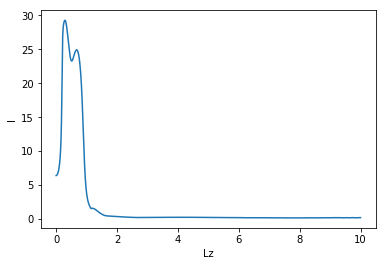

In [17]:
#Energy maximum of laser along z
screen = np.linspace(0, Lz, 30000)

Pcr_const = np.zeros(Nz) + Pcr
fig, ax = plt.subplots()
ax.plot(screen, inten_max)
#ax.plot(screen, Pcr_const)
ax.set_xlabel('Lz')
ax.set_ylabel('I')
ax.legend()
#plt.xlim(0.007, 0.009)
fig.show()

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


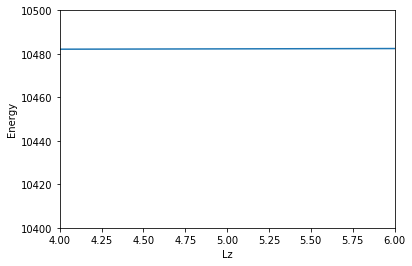

In [21]:
#Total energy of laser along z

screen = np.linspace(0, Lz, Nz)
fig, ax = plt.subplots()
ax.plot(screen, energy)
#ax.plot(screen, Pcr_const)
ax.set_xlabel('Lz')
ax.set_ylabel('Energy')
ax.legend()
plt.xlim(4, 6)
plt.ylim(10400,10500)
fig.show()

In [6]:
print(energy)

[ 28363.39867531  28363.66363592  28363.92861163 ...,  13829.94917489
  13829.94948045  13829.94978609]


/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


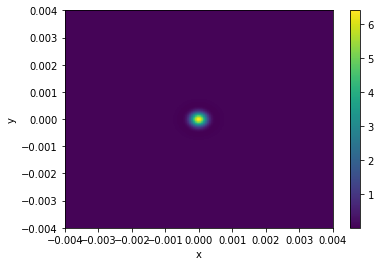

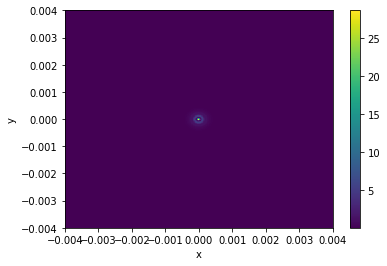

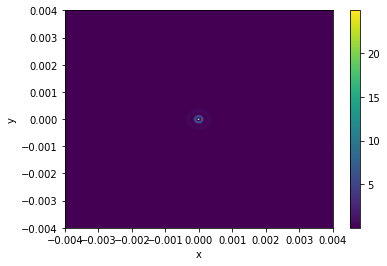

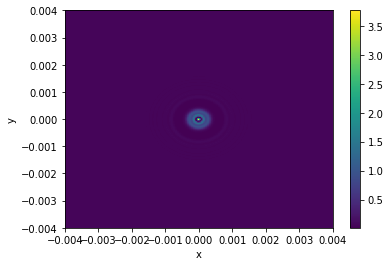

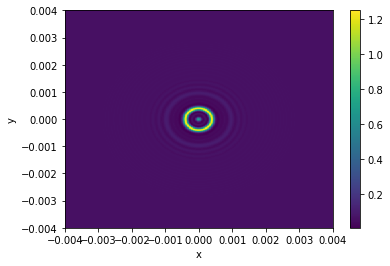

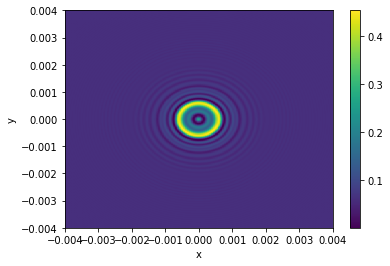

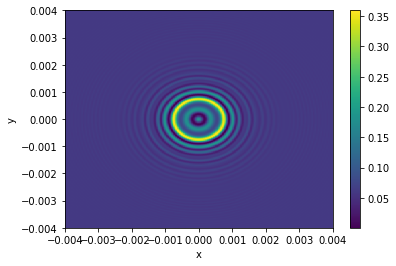

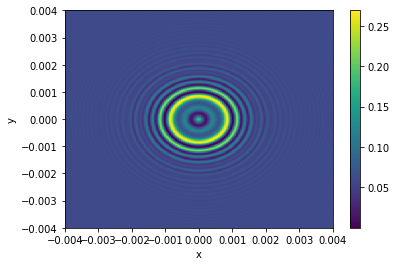

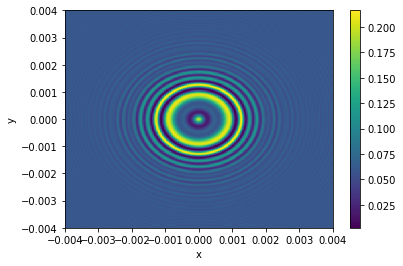

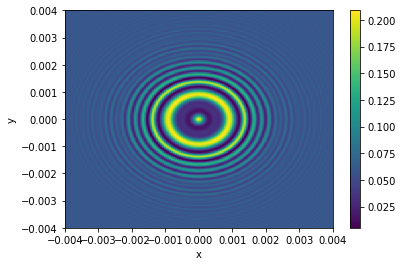

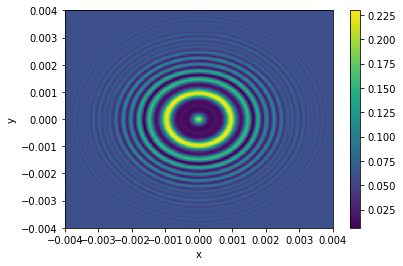

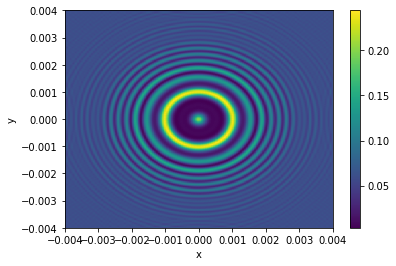

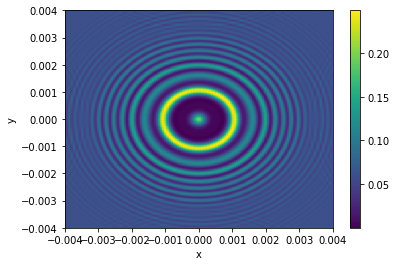

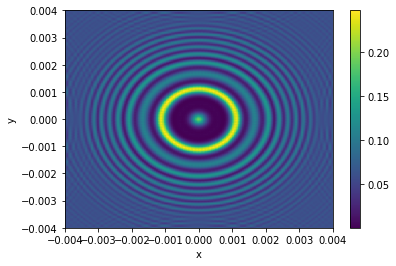

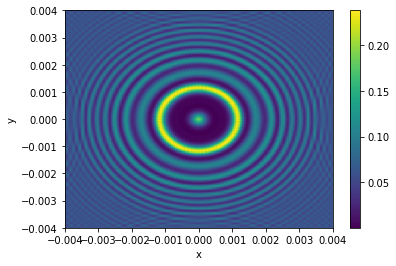

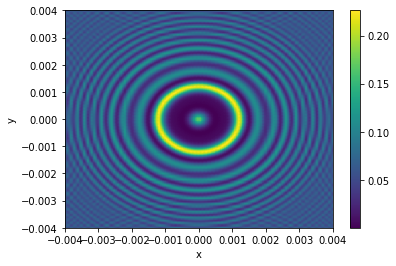

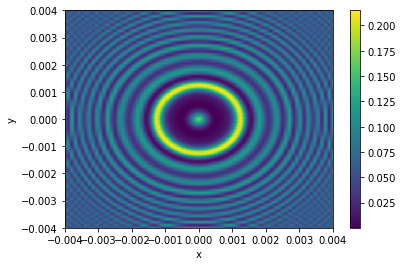

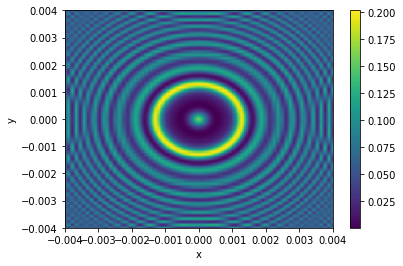

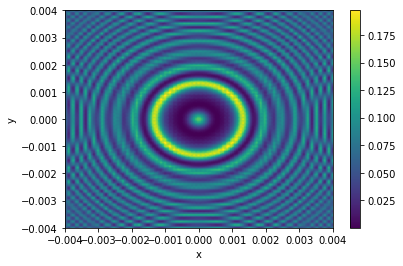

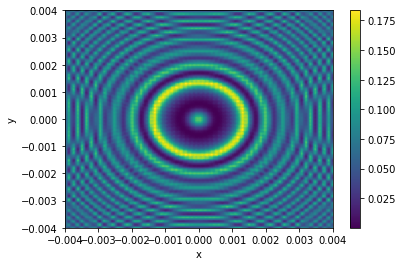

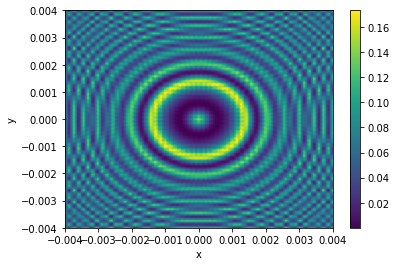

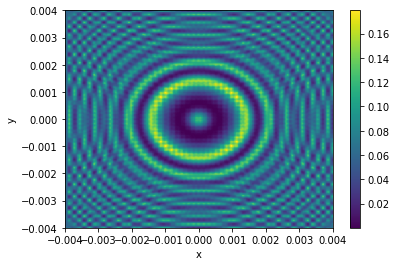

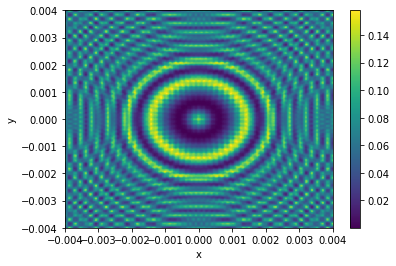

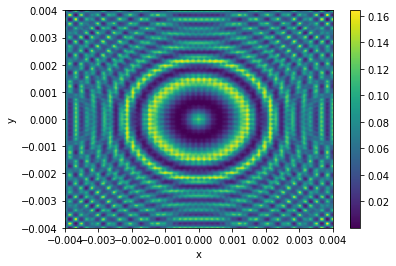

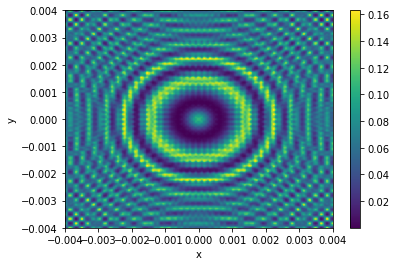

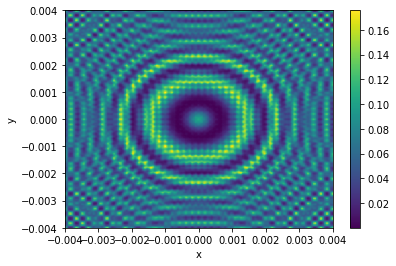

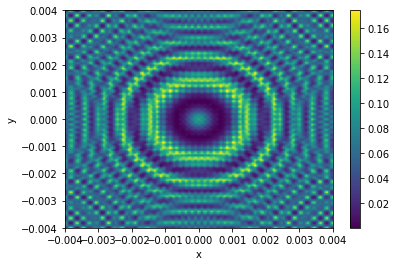

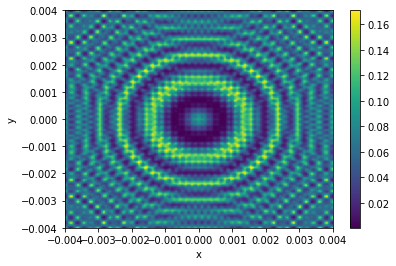

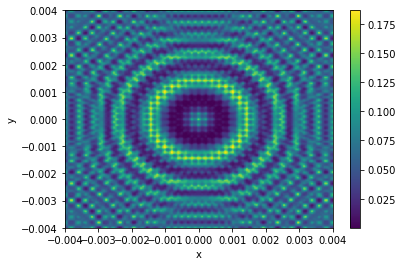

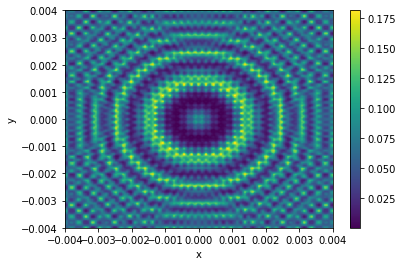

In [19]:
r, d = np.linspace(-L, L, 2*N, retstep=True) 
x, y = np.meshgrid(r,r)
for i in range(inten_num.shape[0]):
        fig, ax = plt.subplots()
        mesh = ax.pcolormesh(x, y, inten_num[i])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        plt.colorbar(mesh, ax=ax)
        #plt.xlim(-0.001,0.001)
        #plt.ylim(-0.001,0.001)
        fig.show()

IndexError: index 150 is out of bounds for axis 0 with size 30

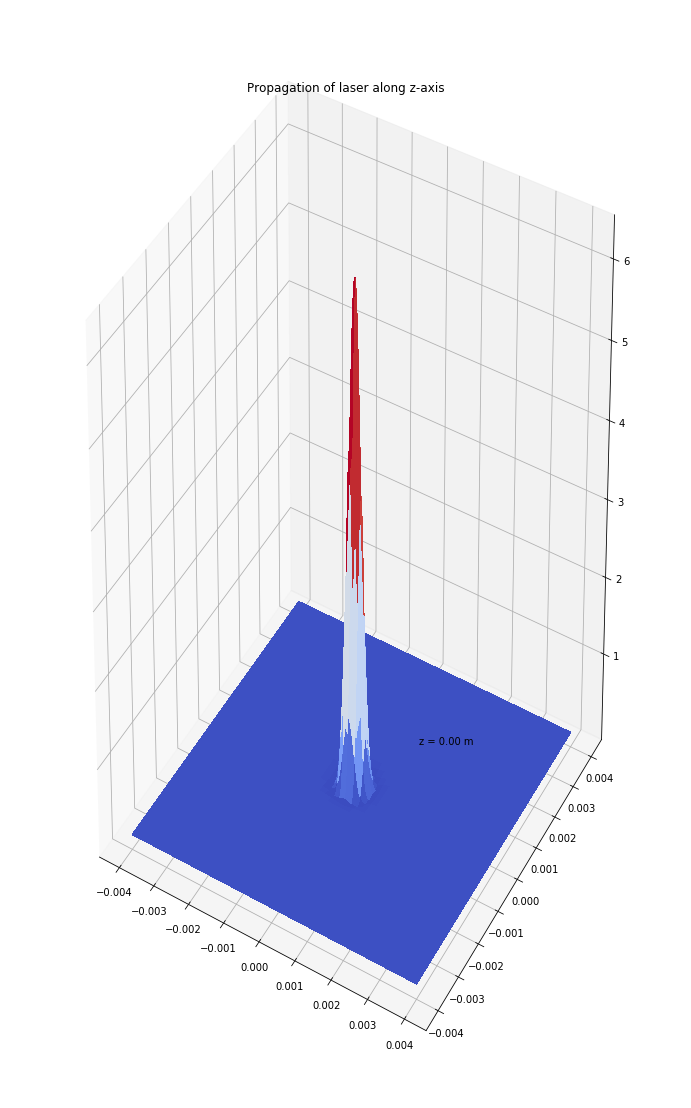

In [8]:
z_interested = np.array([0, 1.5])
pos_interested = z_interested*nb_save/Lz
pos_interested = pos_interested.astype(int)

fig = plt.figure(figsize=(12, 20))
axes = []
ax = fig.add_subplot(111,projection='3d')
ax.set_title('Propagation of laser along z-axis')

for i in range(len(z_interested)):
    surf = ax.plot_surface(x,y,inten_num[pos_interested[i]]+5*i,cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.text(0.001, 0.0015,1.5*i+0.2 ,"z = %.2f m "%z_interested[i], None)
    axes.append(ax)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
#ax.set_zlim(0, 4 )
ax.view_init(10, -60)
plt.show()


In [ ]:
print(inten_num.shape)

In [ ]:


fig = plt.figure(figsize=(12, 20))
axes = []
ax = fig.add_subplot(111,projection='3d')
ax.set_title('Propagation of laser along z-axis')


surf = ax.plot_surface(x,y,inten_num[899],cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.text(0.001, 0.0015,1.5*i+0.2 ,"z = %.2f m "%z_interested[i], None)
axes.append(ax)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-0.003, 0.003 )
ax.set_ylim(-0.003, 0.003)
ax.view_init(10, -60)
plt.show()
